# Audio generator

## KeyData

In [1]:
from adaptivetuning import KeyData

A KeyData object stores data about a specific note, and provides a method to calculate the current amplitude from an envelope.

We can specify a custom function to give a KeyData object the current time, this is very handy for testing purposes.

In [2]:
now = 0
def get_now():
    return now

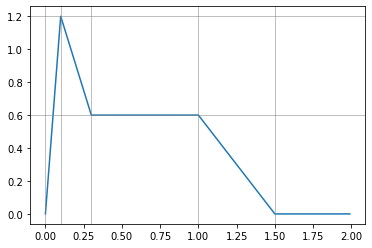

In [5]:
import matplotlib.pyplot as plt
import numpy as np

ts = np.arange(0, 2, 0.01)
amps = []
now = 0
k = KeyData(amplitude=1.2, attack_time=0.1, decay_time=0.2, sustain_level=0.5, release_time=0.5, get_now=get_now)
for t in ts:
    now = t
    amps.append(k.current_amplitude)
    if t == 1:
        k.release()

plt.plot(ts, amps)
plt.axhline(1.2, linewidth=0.5, color='grey')
plt.axhline(0.6, linewidth=0.5, color='grey')
plt.axvline(0, linewidth=0.5, color='grey')
plt.axvline(0.1, linewidth=0.5, color='grey')
plt.axvline(0.3, linewidth=0.5, color='grey')
plt.axvline(1, linewidth=0.5, color='grey')
plt.axvline(1.5, linewidth=0.5, color='grey')

## Audiogenerator

In [1]:
from adaptivetuning import Audiogenerator

<IPython.core.display.Javascript object>

An Audiogenerator object is essentially a simple polyphonic additive synthesizer that is capable of very flexible microtonal tuning.

It manages a sc3nb.Synthdef and an adaptivetuning.Scale. It allows you to specify the sound of the synth and start and stop tones that are tuned according to the Scale. 

You can set sc=None (useful for testing), but if you want to hear anything, you have to start a SuperCollider server using sc3nb.

In [2]:
#import sc3nb
#sc = sc3nb.startup() #TODO testen
sc = None

In [3]:
a = Audiogenerator(sc=sc)

Let's make a mallet-style synth with non-harmonic overtones.

In [5]:
a.attack_time = 0
a.decay_time = 0.5
a.sustain_level = 0.1
a.release_time = 0.1
a.partials_pos = [1, 2.01, 2.9, 3.8, 4.1, 5.5]
a.partials_amp = [0.6**i for i in range(6)]

Let's make a pad-style synth with stretched overtones.

In [8]:
a.attack_time = 1
a.decay_time = 1
a.sustain_level = 0.9
a.release_time = 2
a.partials_pos = {'method': 'harmonic', 'nr_partials': 6, 'octave': 2.5}
a.partials_amp = [0.6**i for i in range(6)]

In [21]:
a.partials_pos

[1.0, 2.5, 4.272873064374344, 6.25, 8.39436958346665, 10.68218266093586]

And stretch the scale accordingly:

In [9]:
a.scale.octave_interval = 2.5
a.scale.tune_all_equal_temperament()  # 12TET with streched octave

Now we can play some music.

In [17]:
a.note_on('C4', 1)
a.note_on('E4', 1)
a.note_on('G4', 1)

A stretched C major chord played with a stretched timbre. Pitches can be given as strings or as midi numbers.

Info about currently playing keys is stored in a dictionary of adaptivetuning.KeyData objects.

In [18]:
a.keys[60].currently_running

True

In [19]:
a.keys[60].current_amplitude

0.009000000000000001

In [20]:
a.keys[60].partials_pos

[1.0, 2.5, 4.272873064374344, 6.25, 8.39436958346665, 10.68218266093586]

In [22]:
a.note_off('C4')
a.note_off('E4')
a.note_off('G4')

In [23]:
a.keys[69].currently_running

False

a.note_on('C4',1) is equivalent to a.register_note_on('C4',1), a.play_note_on('C4')

You can call these methods separately in case you need to have the information about the tones before they are actually sounding, for example to change their tuning in the meantime. Then, a.keys represents not the currently sounding notes but the notes that will sound when they are played with play_note_on

In [24]:
a.register_note_on('C4', 1)

In [25]:
a.keys[60].frequency

221.30828362419666

In [26]:
a.scale[60] = 260

In [27]:
a.keys[60].frequency

260

In [29]:
a.play_note_on(60)

To stop all notes fast regardless of their release time, use stop_all.

In [30]:
a.stop_all()